In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import xgboost as xgb



In [ ]:
import os
import shutil

# Create kaggle folder if it doesn't exist
os.makedirs('/root/.config/kaggle', exist_ok=True)

# Move the file to the correct directory
shutil.move('kaggle.json', '/root/.config/kaggle/kaggle.json')

In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

In [ ]:
!unzip -q house-prices-advanced-regression-techniques.zip

In [17]:
df = pd.read_csv('train.csv',index_col='Id')

# 🏠 House Prices Prediction – Advanced Regression Techniques
**Project Type:** Regression | **Dataset:** [Kaggle House Prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)  
**Author:** [Mohamed Henaish]  
**Goal:** Predict housing prices using various regression models and evaluate performance.

---

## 🔍 1. Exploratory Data Analysis (EDA)
- Check missing values
- Data types
- Basic statistics
- Correlation matrix
- Distribution of target (`SalePrice`)


In [18]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [20]:
df.isna().sum().sort_values(ascending=False).head(15)

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageQual,81
GarageType,81
GarageFinish,81


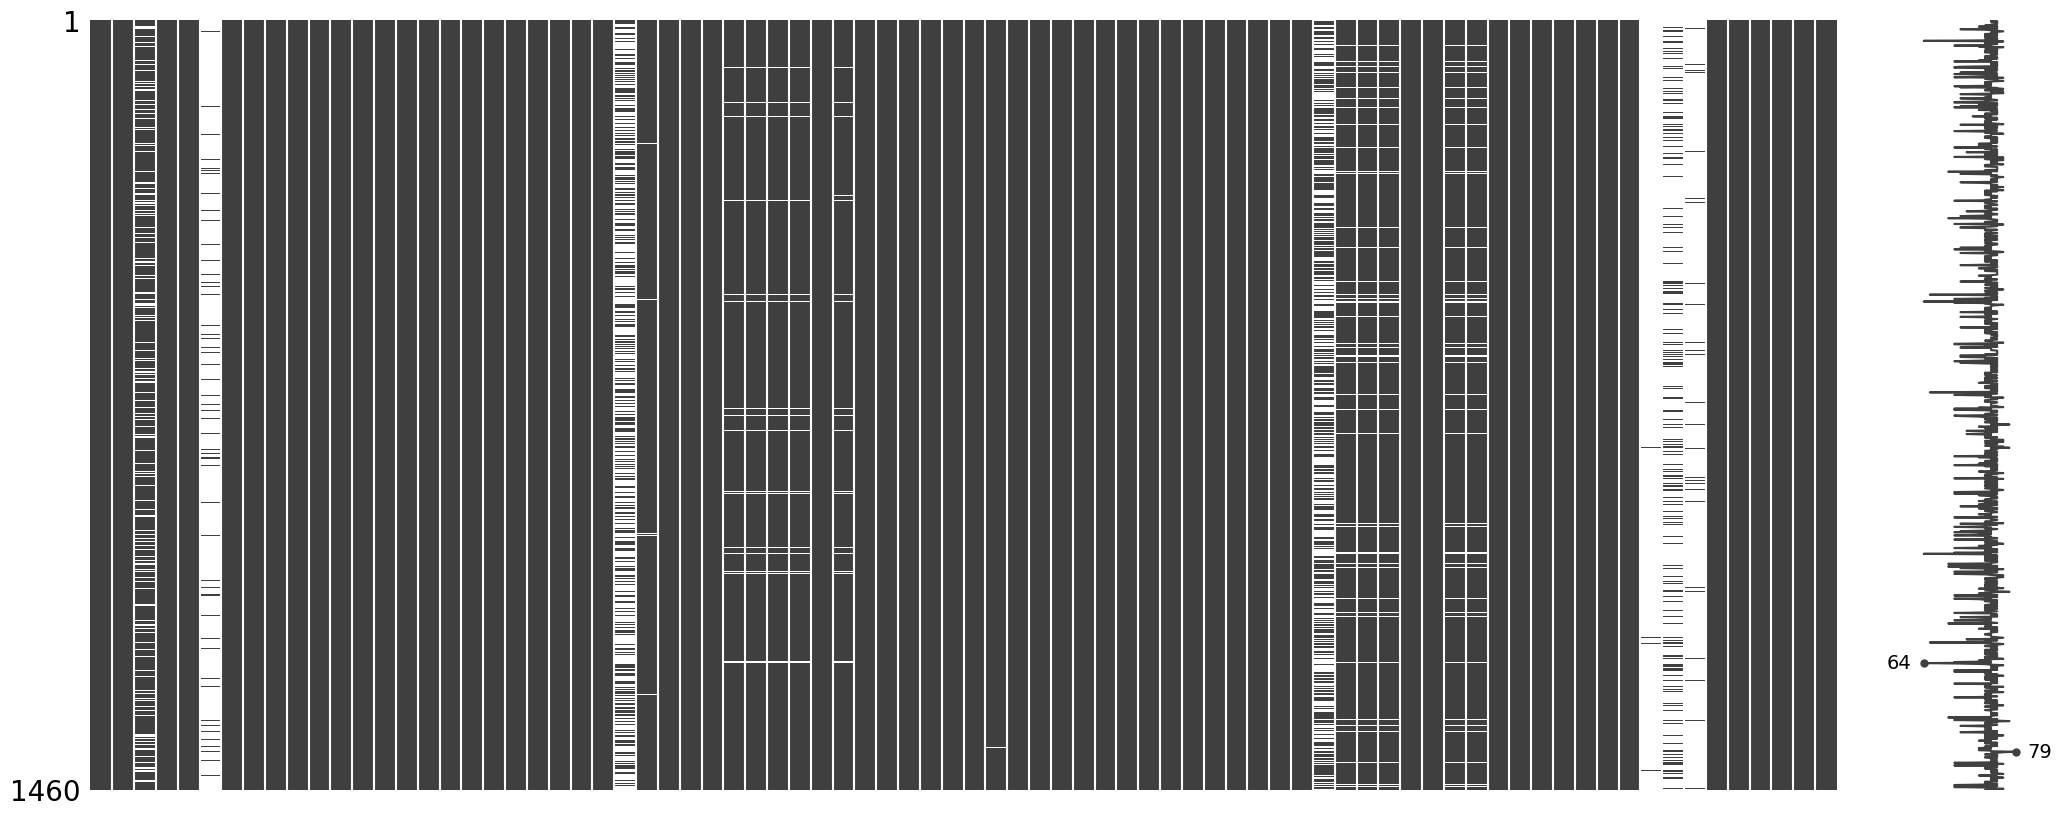

In [21]:
msno.matrix(df)
plt.show()

In [22]:
df=df.drop(['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu'],axis=1)

In [23]:
df=df.dropna()

In [24]:
df.isna().sum().sort_values(ascending=False).head(15)

,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
Street,0
LotShape,0
LandContour,0
Utilities,0
LotConfig,0
LandSlope,0


In [25]:
df.isnull().sum().sort_values(ascending=True)

,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
Street,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [26]:
df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1094 entries, 1 to 1460
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1094 non-null   int64  
 1   MSZoning       1094 non-null   object 
 2   LotFrontage    1094 non-null   float64
 3   LotArea        1094 non-null   int64  
 4   Street         1094 non-null   object 
 5   LotShape       1094 non-null   object 
 6   LandContour    1094 non-null   object 
 7   Utilities      1094 non-null   object 
 8   LotConfig      1094 non-null   object 
 9   LandSlope      1094 non-null   object 
 10  Neighborhood   1094 non-null   object 
 11  Condition1     1094 non-null   object 
 12  Condition2     1094 non-null   object 
 13  BldgType       1094 non-null   object 
 14  HouseStyle     1094 non-null   object 
 15  OverallQual    1094 non-null   int64  
 16  OverallCond    1094 non-null   int64  
 17  YearBuilt      1094 non-null   int64  
 18  YearRemodAdd 

In [28]:
for col in df.select_dtypes(include='object'):
    print(f"\n--- {col} ---")
    print(df[col].unique())


--- MSZoning ---
['RL' 'RM' 'C (all)' 'FV' 'RH']

--- Street ---
['Pave' 'Grvl']

--- LotShape ---
['Reg' 'IR1' 'IR2' 'IR3']

--- LandContour ---
['Lvl' 'Bnk' 'Low' 'HLS']

--- Utilities ---
['AllPub']

--- LotConfig ---
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

--- LandSlope ---
['Gtl' 'Mod' 'Sev']

--- Neighborhood ---
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'OldTown'
 'BrkSide' 'Sawyer' 'NridgHt' 'SawyerW' 'NAmes' 'IDOTRR' 'MeadowV'
 'Timber' 'StoneBr' 'ClearCr' 'Gilbert' 'Edwards' 'NWAmes' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']

--- Condition1 ---
['Norm' 'Feedr' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosN' 'PosA' 'RRNe']

--- Condition2 ---
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA']

--- BldgType ---
['1Fam' '2fmCon' 'TwnhsE' 'Duplex' 'Twnhs']

--- HouseStyle ---
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SLvl' '2.5Unf' '2.5Fin' 'SFoyer']

--- RoofStyle ---
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat']

--- RoofMatl ---
['CompShg' 'WdShngl' 'Membran' 'WdShake'

In [29]:
le = LabelEncoder()
df['Street'] = le.fit_transform(df['Street'])

In [30]:
df.select_dtypes(include='object').nunique().sort_values(ascending=False)


,0
Neighborhood,25
Exterior2nd,16
Exterior1st,14
Condition1,9
SaleType,9
HouseStyle,8
RoofMatl,7
GarageType,6
BsmtFinType2,6
Functional,6


In [31]:
df['LotShape'] = le.fit_transform(df['LotShape'])

In [32]:
df['CentralAir'] = le.fit_transform(df['CentralAir'])

In [33]:
df=df.drop(['Utilities'],axis=1)

In [34]:
df = pd.get_dummies(df, drop_first=True)

In [35]:
df.head(5)

,MSSubClass,LotFrontage,LotArea,Street,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,1,3,7,5,2003,2003,196.0,...,False,False,False,False,True,False,False,False,True,False
2,20,80.0,9600,1,3,6,8,1976,1976,0.0,...,False,False,False,False,True,False,False,False,True,False
3,60,68.0,11250,1,0,7,5,2001,2002,162.0,...,False,False,False,False,True,False,False,False,True,False
4,70,60.0,9550,1,0,7,5,1915,1970,0.0,...,False,False,False,False,True,False,False,False,False,False
5,60,84.0,14260,1,0,8,5,2000,2000,350.0,...,False,False,False,False,True,False,False,False,True,False


In [36]:
df = df.astype({col: 'int' for col in df.select_dtypes(include='bool').columns})

In [37]:
df.head(5)

,MSSubClass,LotFrontage,LotArea,Street,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,1,3,7,5,2003,2003,196.0,...,0,0,0,0,1,0,0,0,1,0
2,20,80.0,9600,1,3,6,8,1976,1976,0.0,...,0,0,0,0,1,0,0,0,1,0
3,60,68.0,11250,1,0,7,5,2001,2002,162.0,...,0,0,0,0,1,0,0,0,1,0
4,70,60.0,9550,1,0,7,5,1915,1970,0.0,...,0,0,0,0,1,0,0,0,0,0
5,60,84.0,14260,1,0,8,5,2000,2000,350.0,...,0,0,0,0,1,0,0,0,1,0


In [38]:
df.select_dtypes(include='object').nunique().sort_values(ascending=False)


,0


In [39]:
df['TotalBathrooms'] = df['FullBath'] + 0.5 * df['HalfBath'] + df['BsmtFullBath'] + 0.5 * df['BsmtHalfBath']
df['HouseAge'] = df['YrSold'] - df['YearBuilt']
df['Remod'] = (df['YearBuilt'] != df['YearRemodAdd']).astype(int)
df['TotalSF'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF']

/tmp/ipython-input-39-1407695516.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['TotalBathrooms'] = df['FullBath'] + 0.5 * df['HalfBath'] + df['BsmtFullBath'] + 0.5 * df['BsmtHalfBath']
/tmp/ipython-input-39-1407695516.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['HouseAge'] = df['YrSold'] - df['YearBuilt']
/tmp/ipython-input-39-1407695516.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all 

In [40]:
df.head(2)

,MSSubClass,LotFrontage,LotArea,Street,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,TotalBathrooms,HouseAge,Remod,TotalSF
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,1,3,7,5,2003,2003,196.0,...,1,0,0,0,1,0,3.5,5,0,2566
2,20,80.0,9600,1,3,6,8,1976,1976,0.0,...,1,0,0,0,1,0,2.5,31,0,2524


In [42]:

def fix_outliers(df, method='smart'):
    df_clean = df.copy()
    numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns

    for col in numeric_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        outliers = df_clean[(df_clean[col] < lower) | (df_clean[col] > upper)]
        outlier_ratio = len(outliers) / len(df_clean)

        if outlier_ratio < 0.01:
            # Group A: Remove rows with outliers
            df_clean = df_clean[~((df_clean[col] < lower) | (df_clean[col] > upper))]

        elif outlier_ratio < 0.15:
            # Group B: Clip values to safe range
            df_clean[col] = df_clean[col].clip(lower, upper)

        else:
            # Group C: Replace outliers with median
            median = df_clean[col].median()
            df_clean.loc[(df_clean[col] < lower) | (df_clean[col] > upper), col] = median

    return df_clean


In [43]:
df_fixed = fix_outliers(df)

In [44]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)

In [45]:
df_fixed.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False).head(18)


,SalePrice
SalePrice,1.000000
TotalSF,0.850847
OverallQual,0.828648
GrLivArea,0.765193
GarageCars,0.717030
GarageArea,0.678932
TotalBsmtSF,0.652056
YearBuilt,0.641789
FullBath,0.629256
1stFlrSF,0.618697


## 🧹 2. Data Preprocessing
- Selected top 15 features based on correlation and intuition
- Handled missing values (if any)
- Performed encoding if needed


In [46]:
features = ['TotalSF','OverallQual', 'GrLivArea', 'GarageCars','GarageArea', 'TotalBsmtSF', 'FullBath', 'YearBuilt','1stFlrSF','TotRmsAbvGrd','Foundation_PConc','YearRemodAdd','GarageYrBlt','ExterQual_Gd','MasVnrArea','BsmtFinType1_GLQ']
target = 'SalePrice'

X = df_fixed[features]
y = df_fixed[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## ⚙️ 3. Model Training & Evaluation – Cross-Validation
Models Used:
- Linear Regression
- Random Forest Regressor
- XGBoost Regressor

Metrics:
- RMSE (Root Mean Squared Error)
- R² (Coefficient of Determination)


In [47]:
model = LinearRegression()

neg_rmse_scores = cross_val_score(
    model, X, y,
    scoring='neg_root_mean_squared_error',
    cv=5
)

rmse_scores = -neg_rmse_scores
print("📊 RMSE scores:", rmse_scores)
print("✅ RMSE:", rmse_scores.mean())

📊 RMSE scores: [25020.36166201 22096.86641725 27816.3051065  23233.83324603
 24833.35527099]
✅ RMSE: 24600.144340554776


In [48]:
r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("📈 R² every fold:", r2_scores)
print("✅ mean R²:", r2_scores.mean())
print("🔁R² ", r2_scores.std())

📈 R² every fold: [0.86511455 0.90583981 0.83375154 0.86184358 0.84528151]
✅ mean R²: 0.8623661993131707
🔁R²  0.02452943778053119


In [49]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')
print(-scores.mean())


24600.144340554776


In [65]:
rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X, y)

print("✅ grid search best :", grid_search.best_params_)
print("📉 min RMSE:", -grid_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
✅ grid search best : {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
📉 min RMSE: 23404.10997925076


In [56]:

model = RandomForestRegressor(n_estimators=100, random_state=42)

neg_rmse_scores = cross_val_score(
    model,
    X,
    y,
    scoring='neg_root_mean_squared_error',
    cv=5
)

rmse_scores = -neg_rmse_scores

In [57]:
print("📊 RMSE every fold:", rmse_scores)
print("✅ mean RMSE:", rmse_scores.mean())
print("🔁 RMS", rmse_scores.std())

📊 RMSE every fold: [23312.58760406 21684.54729197 26800.73670817 22083.94765268
 24673.56863147]
✅ mean RMSE: 23711.07757766855
🔁 RMS 1864.7012426667422


In [58]:
r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("📈 R² every fold:", r2_scores)
print("✅ mean R²:", r2_scores.mean())
print("🔁R² ", r2_scores.std())

📈 R² every fold: [0.88289946 0.90932101 0.84566934 0.87518041 0.84726613]
✅ mean R²: 0.8720672717758824
🔁R²  0.02377736849037275


In [53]:
df.head(5)

,MSSubClass,LotFrontage,LotArea,Street,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,TotalBathrooms,HouseAge,Remod,TotalSF
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,1,3,7,5,2003,2003,196.0,...,1,0,0,0,1,0,3.5,5,0,2566
2,20,80.0,9600,1,3,6,8,1976,1976,0.0,...,1,0,0,0,1,0,2.5,31,0,2524
3,60,68.0,11250,1,0,7,5,2001,2002,162.0,...,1,0,0,0,1,0,3.5,7,1,2706
4,70,60.0,9550,1,0,7,5,1915,1970,0.0,...,1,0,0,0,0,0,2.0,91,1,2473
5,60,84.0,14260,1,0,8,5,2000,2000,350.0,...,1,0,0,0,1,0,3.5,8,0,3343


In [61]:
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    n_jobs=-1
)

In [62]:
neg_rmse_scores = cross_val_score(
    xgb_model,
    X, y,
    scoring='neg_root_mean_squared_error',
    cv=5
)

In [63]:
rmse_scores = -neg_rmse_scores
print("📉 RMSE every fold:", rmse_scores)
print("✅ mean RMSE:", rmse_scores.mean())
print("🔁 RMSE Std:", rmse_scores.std())

# R²
r2_scores = cross_val_score(
    xgb_model,
    X, y,
    scoring='r2',
    cv=5
)
print("\n📈 R² every fold:", r2_scores)
print("✅ mean R²:", r2_scores.mean())
print("🔁 R² Std:", r2_scores.std())

📉 RMSE every fold: [23091.73242188 21795.54296875 26158.68164062 20915.32617188
 25443.84570312]
✅ mean RMSE: 23481.02578125
🔁 RMSE Std: 2029.6659362263565

📈 R² every fold: [0.8851077  0.90839034 0.85297525 0.88804114 0.83758098]
✅ mean R²: 0.8744190812110901
🔁 R² Std: 0.025576306566992


## 📌 6. Conclusion

- The best-performing model was Random Forest with tuned hyperparameters.
- Final performance:
    - RMSE ≈ 23711.07757766855
    - R² ≈ 0.8720672717758824
- XGBoost showed similar performance, indicating that the dataset is not highly nonlinear.




# ✅ 1. Actual vs Predicted


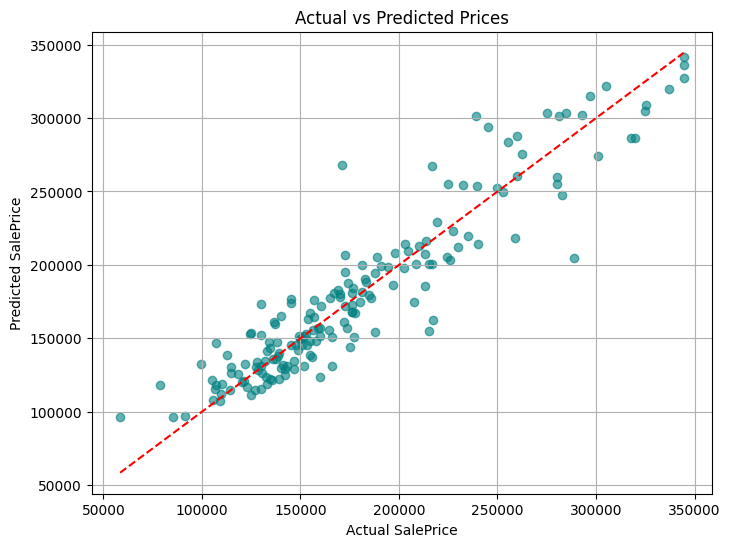

In [66]:
model = RandomForestRegressor(**grid_search.best_params_, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.show()

# ✅ 2. Residuals


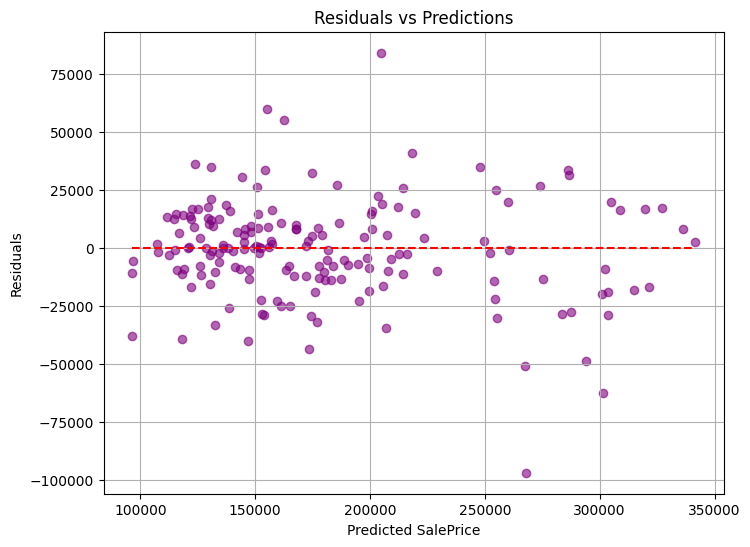

In [67]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='purple')
plt.hlines(0, y_pred.min(), y_pred.max(), colors='red', linestyles='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Residuals vs Predictions')
plt.grid(True)
plt.show()

# ✅ 3. Feature Importance


/tmp/ipython-input-68-831810684.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp, y=feat_imp.index, palette='viridis')


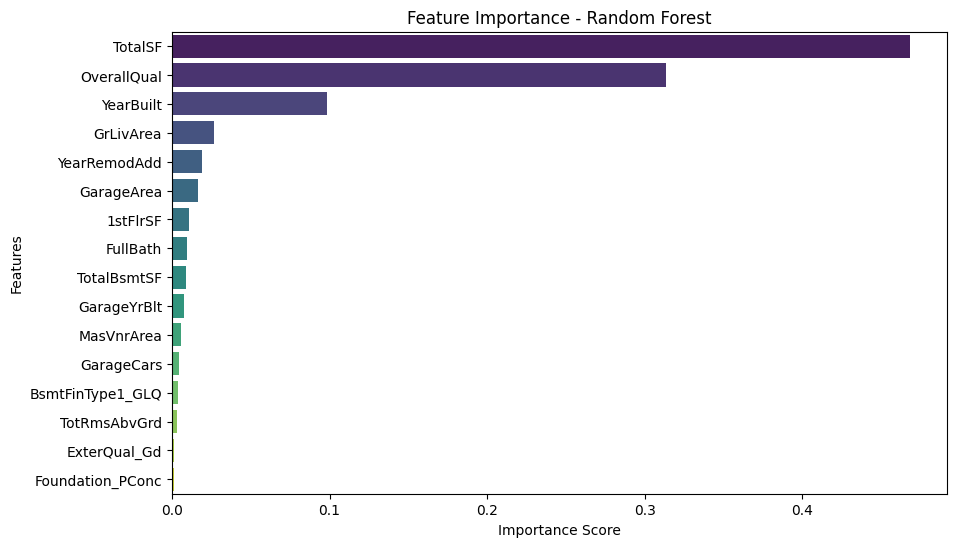

In [68]:
importances = model.feature_importances_
feature_names = X.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp, y=feat_imp.index, palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()